## Autoreload

In [20]:
%reload_ext autoreload
%autoreload 2

## Libraries

In [21]:
# %pip install IPython
from IPython.display import display
from signalepy import plot, plot_ly, utils, ssi_cov

## Parameters

In [22]:
# Column names of the data
labels = ["X", "Y", "Z"] # + Acceleration
#labels_corrected = ["X Corrected", "Y Corrected", "Z Corrected"] # + Acceleration

# Butterworth filter parameters
lowcut = 0.3  # Lower cutoff frequency (Hz)
highcut = 30  # Upper cutoff frequency (Hz)
order = 2  # Filter order

# time window for the data
start_time = 0
power_of_two = 10

# Files
file_name = 'cable_acceleration.txt'
file_location = utils.get_tests_files_location(file_name)

min_model_order = 3
max_model_order = 30


**Import acceleration data**

In [23]:
df_original = utils.import_sts_acceleration_txt(file_location, labels) # Import data for wavelets and fft analysis

In [24]:
df_ready = utils.SignalProcessor(df_original, labels, lowcut, highcut, order, start_time, power_of_two).execute_preparing_signal()

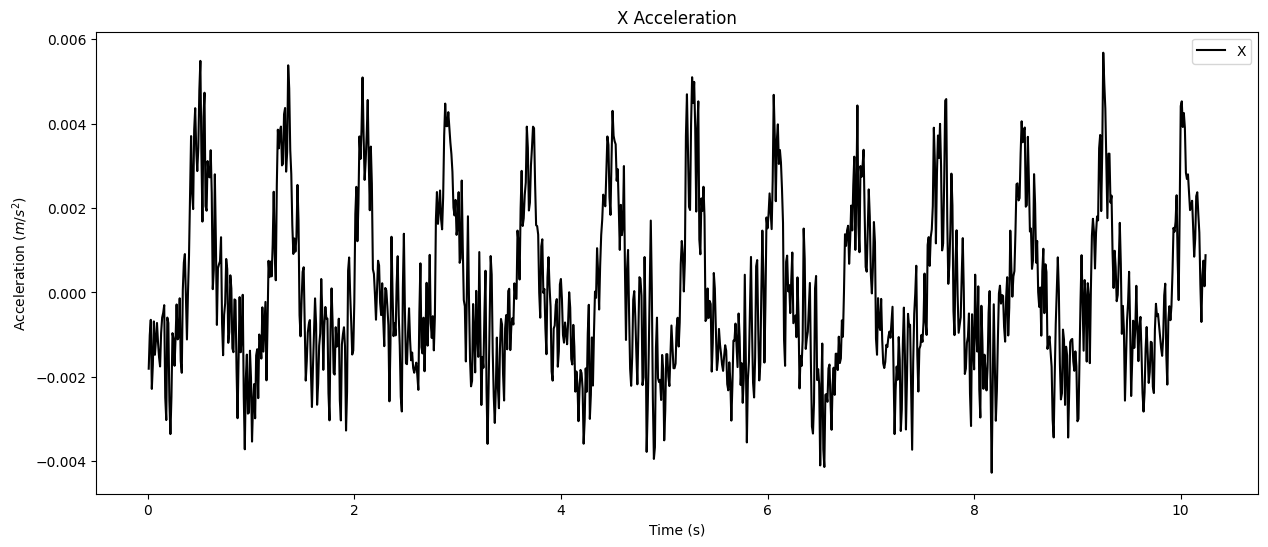

In [26]:
utils.plot_acceleration(df_ready, labels[0], color='k') # 0 for 'X', 1 for 'Y', 2 for 'Z'

In [27]:
max_power_of_two = utils.estimate_power_of_two(df_original) # maximun exponent for the number of samples recomended for the fft
print(f'n = {max_power_of_two}')

n = 17


In [28]:
signal_object = utils.SignalProcessor(df_original, labels, lowcut, highcut, order, start_time, power_of_two)

In [29]:
df_windowed = signal_object.filter_time_window()

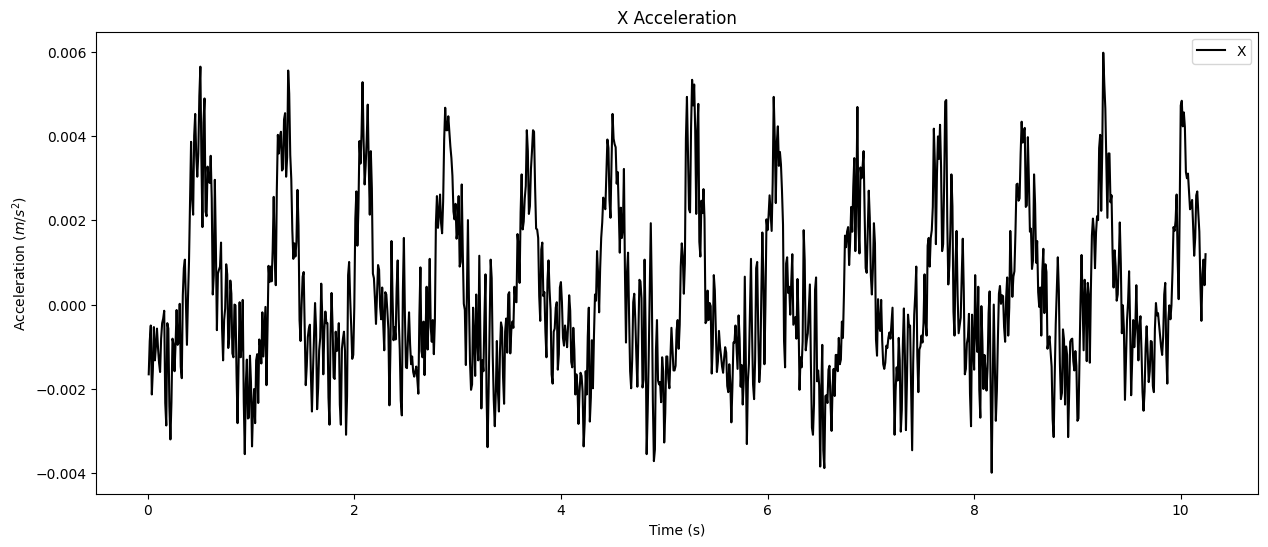

In [31]:
utils.plot_acceleration(df_windowed, labels[0], color='k') # 0 for 'X', 1 for 'Y', 2 for 'Z'

In [32]:
ssicov = ssi_cov.SSICov(df_windowed, labels, min_model_order, max_model_order)

In [33]:
stable_frequencies, stable_damping_ratios, stable_mode_shapes, stable_MAC_values, stability_statuses, natural_frequencies = ssicov.execute_ssicov_analysis()

Performing Stability Analysis: 100%|██████████| 28/28 [00:00<00:00, 102.45model order/s]


Processing status 5/5: 100%|██████████| 27/27 [00:00<?, ?it/s]
c:\Users\ingah\miniforge3\envs\epy\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning:

Casting complex values to real discards the imaginary part

c:\Users\ingah\miniforge3\envs\epy\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning:

Casting complex values to real discards the imaginary part



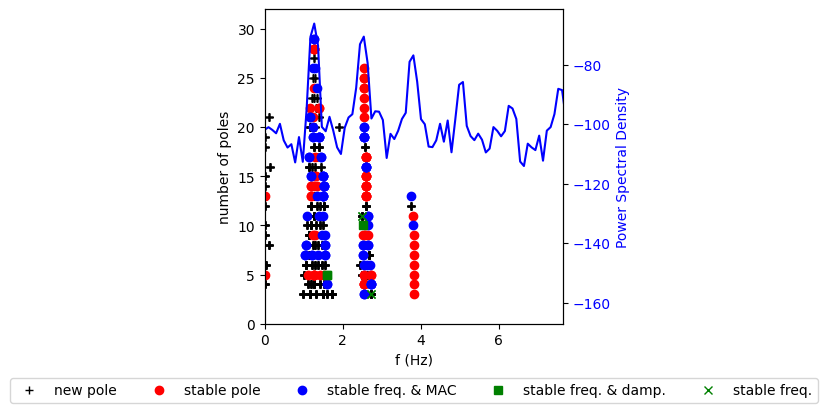

In [35]:
ssicov.plot_stability_diagram()

In [36]:
ssicov.plotly_stability_diagram()

Building Toeplitz Matrix:   9%|▊         | 88949/1042441 [00:00<00:03, 300938.66block/s]

Processing status 5/5: 100%|██████████| 27/27 [00:00<00:00, 58982.40it/s]
